In [1]:
from utils.noise import Noise

import matplotlib.pyplot as plt
from PIL import Image


import numpy as np
from pprint import pprint

In [2]:
lena_path = "../pics/Lena.bmp"

img = Image.open(lena_path).convert("L")
lena_img = np.array(img)

Text(0.5, 1.0, 'Gaussian Noise Image')

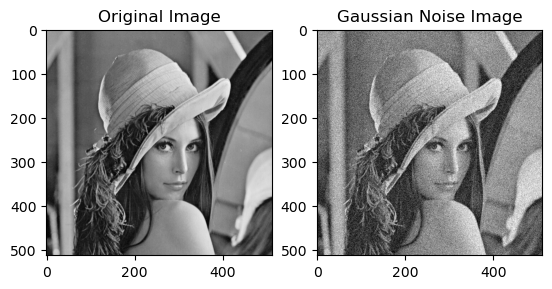

In [3]:
noiseHandler = Noise()

lena_img_gaussian = noiseHandler.add_gaussian_noise(
    lena_img, noise_intensity=10, sigma=2.5
)

# 展示
plt.subplot(121)
plt.imshow(lena_img, cmap="gray")
plt.title("Original Image")

plt.subplot(122)
plt.imshow(lena_img_gaussian, cmap="gray")
plt.title("Gaussian Noise Image")

Text(0.5, 1.0, 'Salt Noise Image')

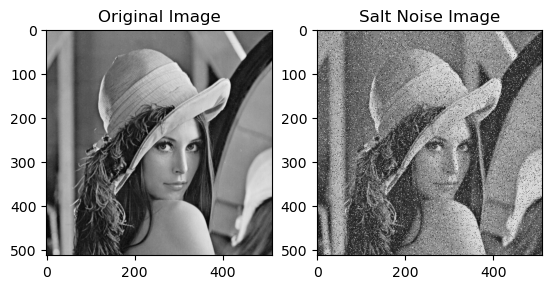

In [4]:
lena_img_salt = noiseHandler.add_salt_noise(lena_img)

plt.subplot(121)
plt.imshow(lena_img, cmap="gray")
plt.title("Original Image")

plt.subplot(122)
plt.imshow(lena_img_salt, cmap="gray")
plt.title("Salt Noise Image")


In [5]:
from utils.enhance import EnhanceUtils

enhanceUtils = EnhanceUtils()

Text(0.5, 1.0, 'Gaussian Noise Image Gaussian Filter')

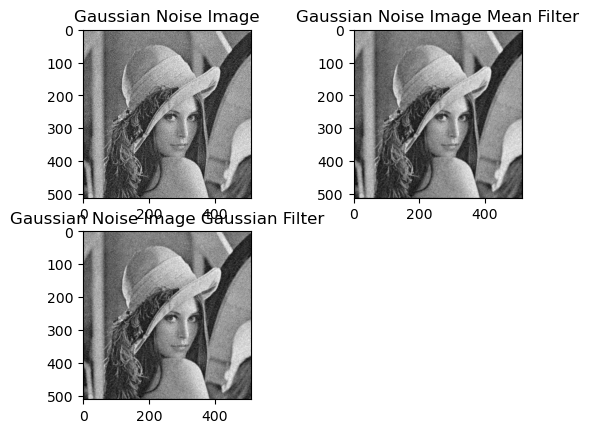

In [6]:
from utils.enhance import MeanFilterType

meanFilterType = MeanFilterType()

lena_img_gaussian_mean_one = enhanceUtils.MeanFilter(
    img=lena_img_gaussian, kernel_size=3
)
lena_img_gaussian_mean_gaussian = enhanceUtils.MeanFilter(
    img=lena_img_gaussian, kernel_size=3, filter_type=meanFilterType.Gaussian()
)


plt.subplot(221)
plt.imshow(lena_img_gaussian, cmap="gray")
plt.title("Gaussian Noise Image")
plt.subplot(222)
plt.imshow(lena_img_gaussian_mean_one, cmap="gray")
plt.title("Gaussian Noise Image Mean Filter")
plt.subplot(223)
plt.imshow(lena_img_gaussian_mean_gaussian, cmap="gray")
plt.title("Gaussian Noise Image Gaussian Filter")


Text(0.5, 1.0, 'Salt Noise Image Mean Filter')

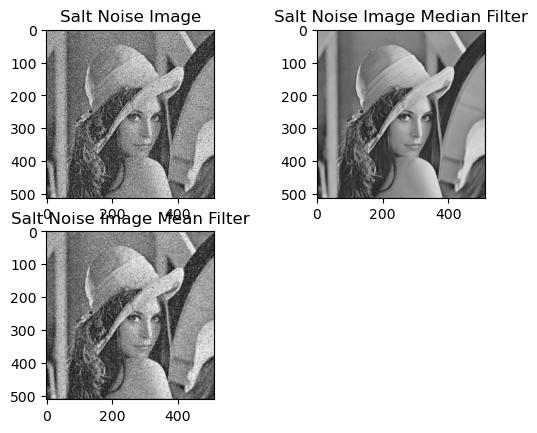

In [8]:
lena_img_salt_median = enhanceUtils.MedianFilter(img=lena_img_salt, kernel_size=3)
lena_img_salt_mean_one = enhanceUtils.MeanFilter(
    img=lena_img_salt, kernel_size=3
)


plt.subplot(221)
plt.imshow(lena_img_salt, cmap="gray")
plt.title("Salt Noise Image")
plt.subplot(222)
plt.imshow(lena_img_salt_median, cmap="gray")
plt.title("Salt Noise Image Median Filter")
plt.subplot(223)
plt.imshow(lena_img_salt_mean_one, cmap="gray")
plt.title("Salt Noise Image Mean Filter")

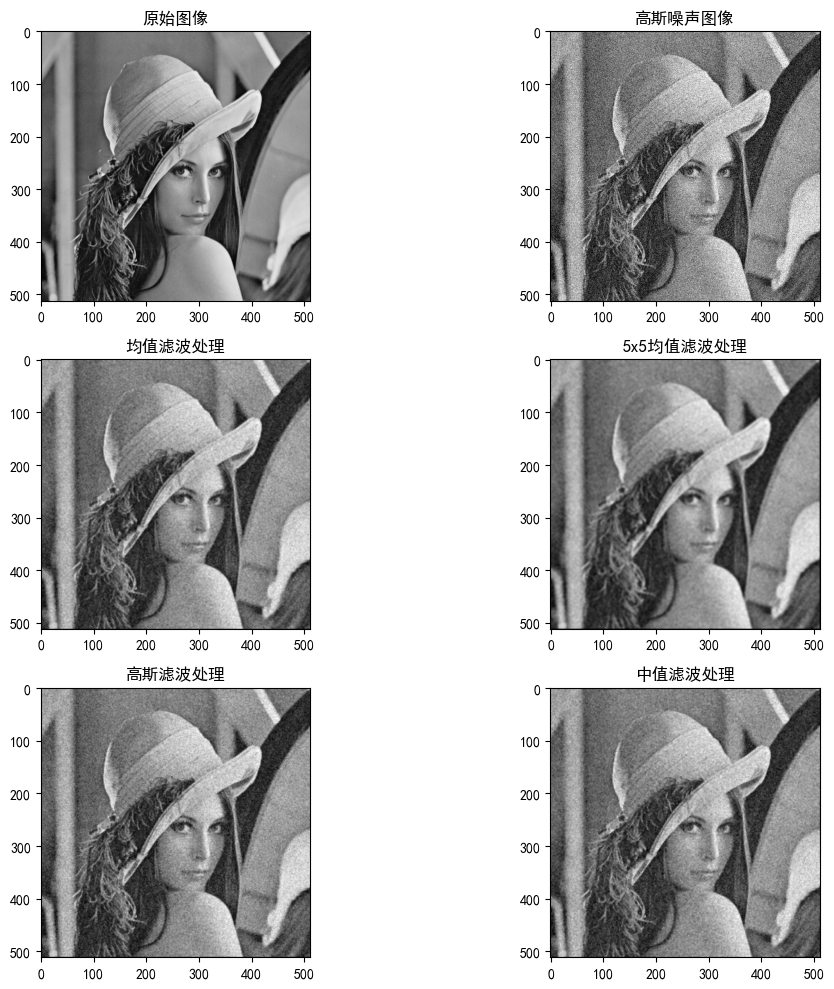

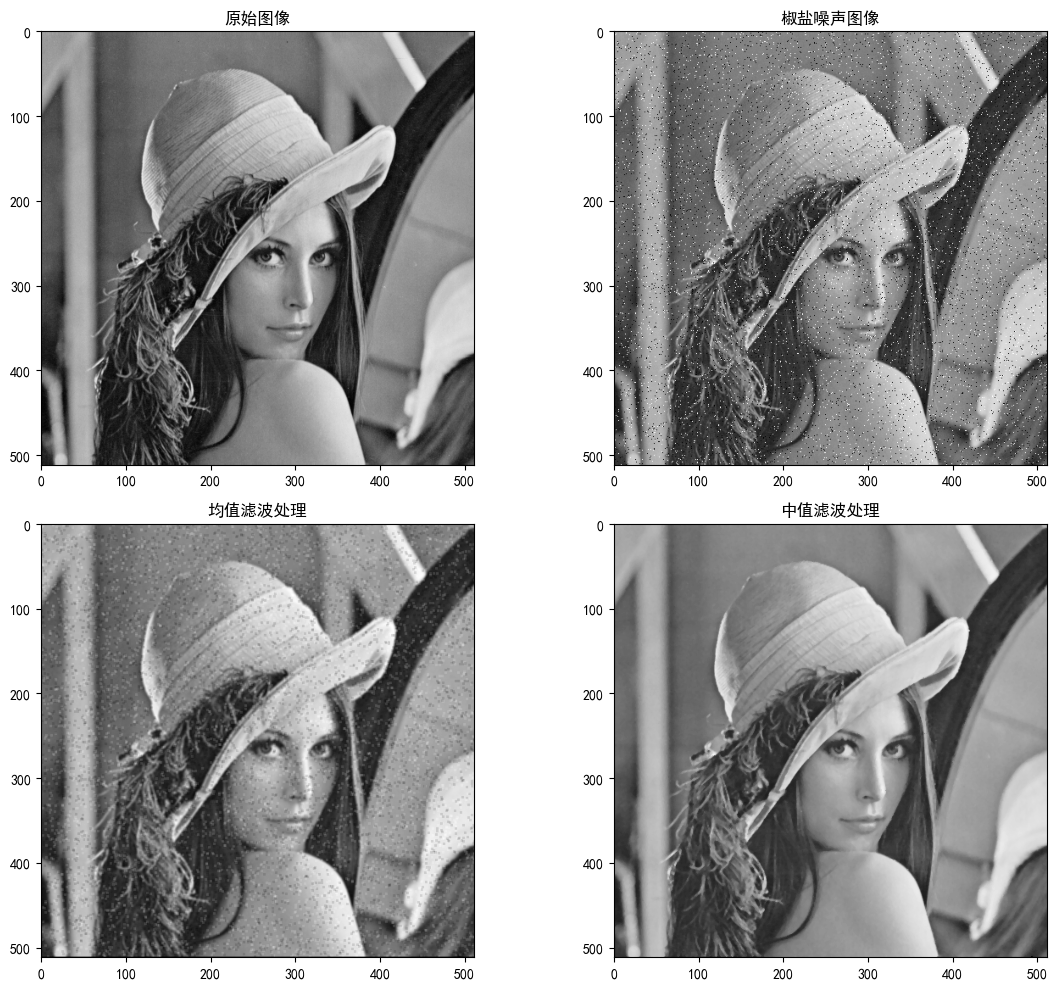

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils.enhance import EnhanceUtils, MeanFilterType, EdgeMode
from utils.noise import Noise

# 设置中文字体支持
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号


# 读取图像
lena_img = np.array(Image.open("../pics/Lena.bmp").convert("L"))  # 转为灰度图

# 初始化工具类
noise_handler = Noise()
enhance_utils = EnhanceUtils()
mean_filter_type = MeanFilterType()

# ---------- 高斯噪声处理 ----------
# 添加高斯噪声
lena_gaussian_noise = noise_handler.add_gaussian_noise(
    lena_img, sigma=1.5, noise_intensity=20
)

# 滤波处理
lena_gaussian_mean = enhance_utils.MeanFilter(
    img=lena_gaussian_noise, filter_type=mean_filter_type.MEAN_ONE()
)

lena_gaussian_mean_5x5 = enhance_utils.MeanFilter(
    img=lena_gaussian_noise, kernel_size=5, filter_type=mean_filter_type.MEAN_5x5()
)

lena_gaussian_mean_gaussian = enhance_utils.MeanFilter(
    img=lena_gaussian_noise, filter_type=mean_filter_type.Gaussian()
)

lena_gaussian_median = enhance_utils.MedianFilter(img=lena_gaussian_noise)

# ---------- 椒盐噪声处理 ----------
# 添加椒盐噪声
lena_salt_pepper = noise_handler.add_salt_noise(lena_img, p_salt=0.02, p_pepper=0.02)

# 滤波处理
lena_salt_mean = enhance_utils.MeanFilter(
    img=lena_salt_pepper, filter_type=mean_filter_type.MEAN_ONE()
)

lena_salt_median = enhance_utils.MedianFilter(img=lena_salt_pepper)

# ---------- 结果可视化 ----------
# 高斯噪声处理结果
plt.figure(figsize=(12, 10))
plt.subplot(321)
plt.imshow(lena_img, cmap="gray")
plt.title("原始图像")

plt.subplot(322)
plt.imshow(lena_gaussian_noise, cmap="gray")
plt.title("高斯噪声图像")

plt.subplot(323)
plt.imshow(lena_gaussian_mean, cmap="gray")
plt.title("均值滤波处理")

plt.subplot(324)
plt.imshow(lena_gaussian_mean_5x5, cmap="gray")
plt.title("5x5均值滤波处理")

plt.subplot(325)
plt.imshow(lena_gaussian_mean_gaussian, cmap="gray")
plt.title("高斯滤波处理")

plt.subplot(326)
plt.imshow(lena_gaussian_median, cmap="gray")
plt.title("中值滤波处理")

plt.tight_layout()
plt.savefig("gaussian_noise_filtering.png")

# 椒盐噪声处理结果
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.imshow(lena_img, cmap="gray")
plt.title("原始图像")

plt.subplot(222)
plt.imshow(lena_salt_pepper, cmap="gray")
plt.title("椒盐噪声图像")

plt.subplot(223)
plt.imshow(lena_salt_mean, cmap="gray")
plt.title("均值滤波处理")

plt.subplot(224)
plt.imshow(lena_salt_median, cmap="gray")
plt.title("中值滤波处理")

plt.tight_layout()
plt.savefig("salt_pepper_noise_filtering.png")

plt.show()